## 4.1 Run ridge regression, choose the best $\lambda$

In [1]:
# import necessary modules
from setup_problem import load_problem
from ridge_regression import *
# from sklearn.linear_model import Ridge

In [3]:
lasso_data_fname = "lasso_data.pickle"
x_train, y_train, x_val, y_val, target_fn, coefs_true, featurize = load_problem(lasso_data_fname)

""" 
4.1.1. Run ridge regression on the provided training dataset.  Choose the λ that minimizes
the empirical risk (i.e.  the average square loss) on the validation set.  Include
a table of the parameter values you tried and the validation performance for each. (10 points) 
"""
## to do
X_train = featurize(x_train)
X_val = featurize(x_val)
grid, results = do_grid_search_ridge(X_train, y_train, X_val, y_val)
print(results)
print("The optimal lambda is", results["param_l2reg"][results["mean_test_score"].argmin()])

    param_l2reg  mean_test_score  mean_train_score
0      0.000001         0.142555          0.052619
1      0.000010         0.141880          0.052625
2      0.000100         0.136683          0.053008
3      0.001000         0.123424          0.060210
4      0.010000         0.120759          0.080481
5      0.100000         0.132305          0.112328
6      1.000000         0.202270          0.193434
7      1.300000         0.218293          0.209230
8      1.600000         0.231872          0.222423
9      1.900000         0.243568          0.233665
10     2.200000         0.253783          0.243399
11     2.500000         0.262806          0.251936
12     2.800000         0.270858          0.259506
The optimal lambda is 0.01


In [ ]:
# According to the chart we get, \lambda = 0.01 generates the minimal test MSE. 
# Therefore, it will be the \lambda chosen for the following.

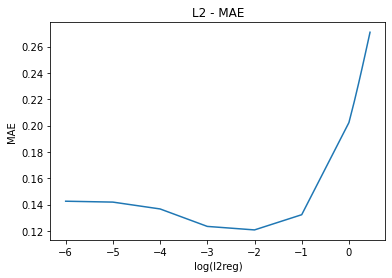

In [76]:
"""
4.1.2. Also include a plot of the results (Validation loss against l2 regularization parameters)
(5 points) 
Hint: you may want to use a log scale for the x axis
"""
plt.figure()
plt.title("L2 - MSE")
plt.xlabel('log(l2reg)')
plt.ylabel('MSE')
x_axis = np.log10(results["param_l2reg"])
y_axis = results["mean_test_score"]
plt.plot(x_axis, y_axis)
plt.show()
## to do

## 4.2 Visualize the prediction functions

Figure(432x288)


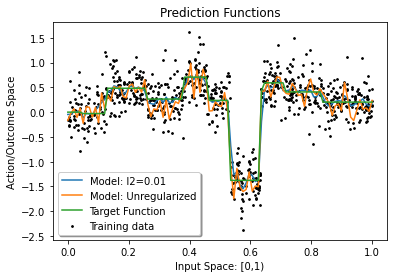

In [69]:
""" 
4.2 Now we want to visualize the prediction functions.  On the same axes, plot the following:
the training data, the target function, an unregularized least squares fit (still using the 
featurized data),and the prediction function chosen in the previous problem. (5 points) 
Hint: you may find plot_prediction_functions() from ridge_regression module useful
"""

# initialize a model with the λ chosen in 4.1, fit the model
l2 = 0.01
ridge = RidgeRegression(l2reg=l2)
ridge.fit(X_train, y_train)
# initialize a model without regularization, fit the model
unregular = RidgeRegression(l2reg=0)
unregular.fit(X_train, y_train)
# Plot the training data, the target function, an unregularized least square fit, 
# the prediction function chosen in 4.1

x_range=np.linspace(0,1,100)
y1 = ridge.predict(featurize(x_range))
y2 = unregular.predict(featurize(x_range))
y3 = target_fn(x_range)
pred_fns = [{"name":"Model: l2=0.01", "preds":y1}, 
            {"name":"Model: Unregularized", "preds":y2}, 
            {"name":"Target Function", "preds":y3}]

print(plot_prediction_functions(x_range, pred_fns, x_train, y_train, legend_loc="best"))




Figure(432x288)


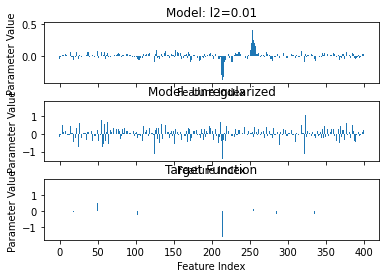

In [73]:
""" 
Next, along the lines of the bar charts produced by the code in compare_parameter_vectors, 
visualize the coefficients for each of the prediction functions plotted, including the target 
function. (5 points) 
Hint: you may find compare_parameter_vectors() from ridge_regression module useful
"""
## to do
pred_fns = [{"name":"Model: l2=0.01", "coefs":ridge.w_}, 
            {"name":"Model: Unregularized", "coefs":unregular.w_}, 
            {"name":"Target Function", "coefs":coefs_true}]
print(compare_parameter_vectors(pred_fns))



In [ ]:
""" 
Describe the patterns, including the scale of the coefficients, as well as which coefficients 
have the most weight (5 points) 
"""


In [ ]:
# Unregularized model waves everywhere. It has a lot of peaks but with small weights distributed.

# The target function (ground truth)only has a peak at index = 215, and most of the coefficients are zero.
# This peak has a great weight.

# The regularized model has two peaks. One of the peak is also at index = 215, coinciding with the target function.
#           Another peak is at roughly index = 265.
#           Most of the coefficients for regularized model are around zero, i.e. they have very small weight.

# Interpretation: With the restriction on the l2-norm of the estimator, we do have a better predicted function.